In [6]:
import cf_xarray  # noqa: F401
import copernicusmarine
import numpy as np
import pandas as pd
import xarray as xr
from seapopym.standard.units import StandardUnitsLabels

In [7]:
export_folder = "/Users/ash/Documents/Workspaces/Data/phd/SEAPODYM_LMTL/2025-01-10_-_CAFE_HOT/data"
cafe_path = "../1_1_Forcing/raw/CAFE_NPP_8D_25KM_1998_2022.nc"

In [8]:
LATITUDE = 22.75
LONGITUDE = -158
POSITION_TOLERANCE = 1
START_TIME = "2005-01-01"
END_TIME = "2010-01-01"

## CMEMS


In [9]:
coordinates = {
    "minimum_latitude": LATITUDE - POSITION_TOLERANCE,
    "maximum_latitude": LATITUDE + POSITION_TOLERANCE,
    "minimum_longitude": LONGITUDE - POSITION_TOLERANCE,
    "maximum_longitude": LONGITUDE + POSITION_TOLERANCE,
    "start_datetime": START_TIME,
    "end_datetime": END_TIME,
}

bio = copernicusmarine.open_dataset(dataset_id="cmems_mod_glo_bgc_my_0.083deg-lmtl_PT1D-i", **coordinates)
physic = copernicusmarine.open_dataset(dataset_id="cmems_mod_glo_bgc_my_0.083deg-lmtl-Fphy_PT1D-i", **coordinates)

INFO - 2025-01-10T15:32:58Z - Selected dataset version: "202411"
INFO - 2025-01-10T15:32:58Z - Selected dataset part: "default"
INFO - 2025-01-10T15:33:01Z - Selected dataset version: "202411"
INFO - 2025-01-10T15:33:01Z - Selected dataset part: "default"


In [10]:
bio.load()

<xarray.Dataset> Size: 79MB
Dimensions:       (latitude: 24, longitude: 25, time: 1827)
Coordinates:
  * latitude      (latitude) float32 96B 21.83 21.92 22.0 ... 23.58 23.67 23.75
  * longitude     (longitude) float32 100B -159.0 -158.9 ... -157.1 -157.0
  * time          (time) datetime64[ns] 15kB 2005-01-01 ... 2010-01-01
Data variables:
    mnkc_epi      (time, latitude, longitude) float64 9MB 0.2875 ... 0.3398
    mnkc_hmlmeso  (time, latitude, longitude) float64 9MB 0.5373 ... 1.175
    mnkc_lmeso    (time, latitude, longitude) float64 9MB 2.253 2.443 ... 3.132
    mnkc_mlmeso   (time, latitude, longitude) float64 9MB 1.058 1.089 ... 1.559
    mnkc_mumeso   (time, latitude, longitude) float64 9MB 0.5866 ... 0.7431
    mnkc_umeso    (time, latitude, longitude) float64 9MB 0.6389 ... 0.7626
    npp           (time, latitude, longitude) float64 9MB 265.1 254.1 ... 272.8
    zeu           (time, latitude, longitude) float64 9MB 59.06 62.22 ... 81.64
    zooc          (time, latitude, longitude) float64 9MB 0.2368 ... 0.2891
Attributes:
    institution:  CLS
    history:      Created on 2024-10-17
    Conventions:  CF-1.7
    title:        Global ocean low and mid trophic levels biomass content hin...
    references:   http://www.cls.fr; http://www.seapodym.eu
    source:       SEAPODYM-LMTL 3.0.0

In [11]:
physic.load()

<xarray.Dataset> Size: 110MB
Dimensions:              (depth: 3, latitude: 25, longitude: 25, time: 1827)
Coordinates:
  * depth                (depth) int32 12B 1 2 3
  * latitude             (latitude) float32 100B 21.75 21.83 ... 23.67 23.75
  * longitude            (longitude) float32 100B -159.0 -158.9 ... -157.0
  * time                 (time) datetime64[ns] 15kB 2005-01-01 ... 2010-01-01
Data variables:
    T                    (time, depth, latitude, longitude) float64 27MB 25.0...
    U                    (time, depth, latitude, longitude) float64 27MB 0.00...
    V                    (time, depth, latitude, longitude) float64 27MB -0.0...
    pelagic_layer_depth  (time, depth, latitude, longitude) float64 27MB 102....
Attributes:
    institution:  CLS
    history:      Created on 2024-09-6
    Conventions:  CF-1.7
    title:        Physical forcings of global ocean low and mid trophic level...
    references:   http://www.cls.fr; http://www.seapodym.eu
    source:       SEAPODYM-LMTL 3.0.0

In [12]:
physic = physic.interp_like(bio)

In [13]:
with xr.set_options(keep_attrs=True):
    data = xr.merge([bio, physic])
    data["T"].attrs["units"] = str(StandardUnitsLabels.temperature.units)
data

<xarray.Dataset> Size: 184MB
Dimensions:              (latitude: 24, longitude: 25, time: 1827, depth: 3)
Coordinates:
  * latitude             (latitude) float32 96B 21.83 21.92 22.0 ... 23.67 23.75
  * longitude            (longitude) float32 100B -159.0 -158.9 ... -157.0
  * time                 (time) datetime64[ns] 15kB 2005-01-01 ... 2010-01-01
  * depth                (depth) int32 12B 1 2 3
Data variables: (12/13)
    mnkc_epi             (time, latitude, longitude) float64 9MB 0.2875 ... 0...
    mnkc_hmlmeso         (time, latitude, longitude) float64 9MB 0.5373 ... 1...
    mnkc_lmeso           (time, latitude, longitude) float64 9MB 2.253 ... 3.132
    mnkc_mlmeso          (time, latitude, longitude) float64 9MB 1.058 ... 1.559
    mnkc_mumeso          (time, latitude, longitude) float64 9MB 0.5866 ... 0...
    mnkc_umeso           (time, latitude, longitude) float64 9MB 0.6389 ... 0...
    ...                   ...
    zeu                  (time, latitude, longitude) float64 9MB 59.06 ... 81.64
    zooc                 (time, latitude, longitude) float64 9MB 0.2368 ... 0...
    T                    (time, depth, latitude, longitude) float64 26MB 25.1...
    U                    (time, depth, latitude, longitude) float64 26MB 0.01...
    V                    (time, depth, latitude, longitude) float64 26MB -0.0...
    pelagic_layer_depth  (time, depth, latitude, longitude) float64 26MB 88.5...
Attributes:
    institution:  CLS
    history:      Created on 2024-10-17
    Conventions:  CF-1.7
    title:        Global ocean low and mid trophic levels biomass content hin...
    references:   http://www.cls.fr; http://www.seapodym.eu
    source:       SEAPODYM-LMTL 3.0.0

## CAFE


In [14]:
cafe_data = xr.open_dataset(cafe_path)

cafe_data = cafe_data.rename({"lat": "latitude", "lon": "longitude"})
cafe_data["CAFE"] = cafe_data["CAFE"].assign_attrs({"units": "mg m-2 day-1", "weight": "carbon"})
cafe_data_hot = cafe_data.sel(
    latitude=slice(LATITUDE - 2 * POSITION_TOLERANCE, LATITUDE + 2 * POSITION_TOLERANCE),
    longitude=slice(LONGITUDE - 2 * POSITION_TOLERANCE, LONGITUDE + 2 * POSITION_TOLERANCE),
    time=slice(START_TIME, END_TIME),
)
cafe_data_hot.load()

<xarray.Dataset> Size: 475kB
Dimensions:    (time: 231, latitude: 16, longitude: 16)
Coordinates:
  * longitude  (longitude) float32 64B -159.9 -159.6 -159.4 ... -156.4 -156.1
  * latitude   (latitude) float32 64B 20.88 21.12 21.38 ... 24.12 24.38 24.62
  * time       (time) datetime64[ns] 2kB 2005-01-01 2005-01-09 ... 2010-01-01
Data variables:
    CAFE       (time, latitude, longitude) float64 473kB 339.9 326.9 ... 327.0
Attributes:
    PI Name:      Thomas Ryan-Keogh
    PI Contact:   tryankeogh@csir.co.za
    History:      2023-01-02 08:55:09.514113 Python
    Conventions:  CF-1.8
    Keywords:     Primary Production

In [15]:
cafe_data_hot = cafe_data_hot.interp_like(data)
cafe_data_hot

<xarray.Dataset> Size: 9MB
Dimensions:    (time: 1827, latitude: 24, longitude: 25)
Coordinates:
  * time       (time) datetime64[ns] 15kB 2005-01-01 2005-01-02 ... 2010-01-01
  * latitude   (latitude) float32 96B 21.83 21.92 22.0 ... 23.58 23.67 23.75
  * longitude  (longitude) float32 100B -159.0 -158.9 -158.8 ... -157.1 -157.0
Data variables:
    CAFE       (time, latitude, longitude) float64 9MB 355.5 343.1 ... 321.1
Attributes:
    PI Name:      Thomas Ryan-Keogh
    PI Contact:   tryankeogh@csir.co.za
    History:      2023-01-02 08:55:09.514113 Python
    Conventions:  CF-1.8
    Keywords:     Primary Production

In [16]:
data["cafe"] = cafe_data_hot["CAFE"]

## Create mask


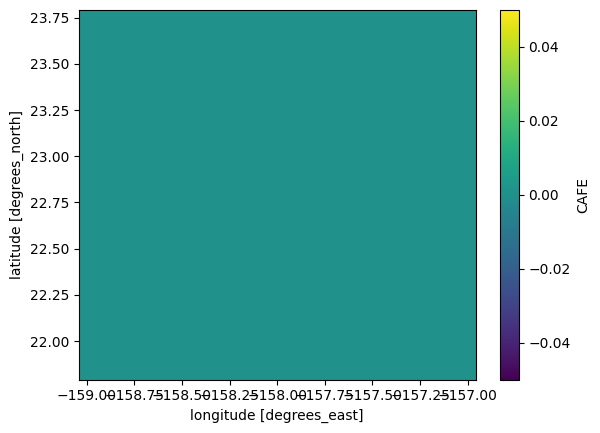

In [17]:
cafe_data_hot.CAFE.isnull().sum("time").plot()

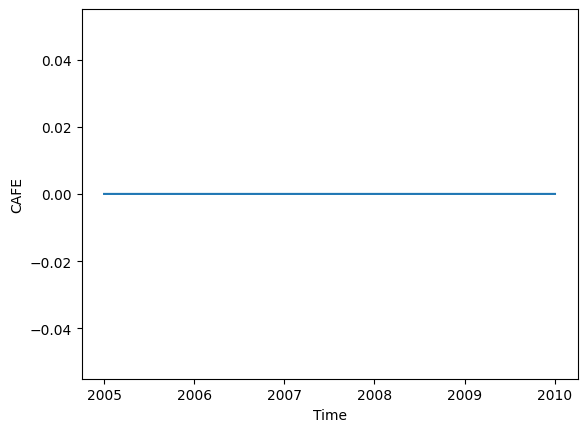

In [18]:
cafe_data_hot.CAFE.isnull().sum(["latitude", "longitude"]).plot()

In [19]:
data["mask"] = xr.full_like(data["T"], 2, dtype=np.int64)
mask = data["mask"][0, 0].drop_vars(["time", "depth"])
mask.latitude.attrs = {
    "standard_name": "latitude",
    "long_name": "latitude",
    "units": "degrees_north",
    "axis": "Y",
}
mask.longitude.attrs = {
    "standard_name": "longitude",
    "long_name": "longitude",
    "units": "degrees_east",
    "axis": "X",
}
mask.attrs = {}
mask.to_netcdf(f"{export_folder}/mask.nc")
xr.load_dataset(f"{export_folder}/mask.nc")

<xarray.Dataset> Size: 5kB
Dimensions:    (latitude: 24, longitude: 25)
Coordinates:
  * latitude   (latitude) float32 96B 21.83 21.92 22.0 ... 23.58 23.67 23.75
  * longitude  (longitude) float32 100B -159.0 -158.9 -158.8 ... -157.1 -157.0
Data variables:
    mask       (latitude, longitude) int64 5kB 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2

## To float 64


In [20]:
data = data.astype(np.float64)

## Export


In [21]:
for date in data["T"].time.values:
    date_as_string = pd.to_datetime(str(date)).strftime("%Y%m%d")
    data.sel(time=[date])[["U", "V", "T", "cafe"]].to_netcdf(f"{export_folder}/data_{date_as_string}.nc")

This shell commands can be run from seapodym-lmtl directory.

```bash
❯ mpirun -mca btl ^openib -np 6 ./build/bin/seapodym-lmtl -P -G D1N1 -V error /Users/ash/Documents/Workspaces/Data/phd/SEAPODYM_LMTL/2024-12-13_-_Constant_fields_no_transport/zpk.tmpl.xml
```

```bash
❯ mpirun -mca btl ^openib -np 6 ./build/bin/seapodym-lmtl -B -G D1N1 -V error /Users/ash/Documents/Workspaces/Data/phd/SEAPODYM_LMTL/2024-12-13_-_Constant_fields_no_transport/zpk.tmpl.xml
```
